In [1]:
import pandas as pd
import numpy as np

In [2]:
mushroom_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

In [3]:
# class is the target variable: p=poisonous, e=edible
mushroom_df.columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',\
                       'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',\
                       'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring',\
                       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type',\
                       'spore_print_color', 'population', 'habitat']

In [4]:
mushroom_df2 = mushroom_df.drop(['bruises', 'odor', 'gill_attachment',\
                       'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',\
                       'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring',\
                       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type',\
                       'spore_print_color', 'population'], axis=1, level=None, inplace=False, errors='raise')
mushroom_df2.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'habitat'], dtype='object')

In [5]:
# convert values class column (this is target variable) to numerical, p=1, e=0
mushroom_df2['class'].replace(to_replace='p', value=1, inplace=True)
mushroom_df2['class'].replace(to_replace='e', value=0, inplace=True)
mushroom_df2.replace(to_replace='?', value=np.nan, inplace=True)

In [6]:
mushroom_df2.head(2)

,class,cap_shape,cap_surface,cap_color,habitat
0,1,x,s,n,u
1,0,x,s,y,g


In [7]:
# can run get_dummies on whole dataframe as this function only encodes object or category dtype. 'class' is now int
mushroom_df2 = pd.get_dummies(mushroom_df2)
mushroom_df2.sample(5)

,class,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,...,cap_color_u,cap_color_w,cap_color_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5377,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3622,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3426,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7033,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3583,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
mushroom_df2.columns

Index(['class', 'cap_shape_b', 'cap_shape_c', 'cap_shape_f', 'cap_shape_k',
       'cap_shape_s', 'cap_shape_x', 'cap_surface_f', 'cap_surface_g',
       'cap_surface_s', 'cap_surface_y', 'cap_color_b', 'cap_color_c',
       'cap_color_e', 'cap_color_g', 'cap_color_n', 'cap_color_p',
       'cap_color_r', 'cap_color_u', 'cap_color_w', 'cap_color_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object')

In [9]:
# Model training time!
from sklearn.model_selection import train_test_split

X = mushroom_df2.iloc[: , 1:]
y = mushroom_df2.iloc[: , :1]['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
% matplotlib inline

In [11]:
from itertools import product
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [62]:
# Recycled from Classification_Errors.ipynb
def plot_roc(ytrue, yproba, title='ROC curves'):
    auc = roc_auc_score(ytrue, yproba)
    fpr, tpr, thr = roc_curve(ytrue, yproba)
    plt.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=.4)
    plt.plot(fpr, tpr, label='auc={:.2f}%'.format(auc*100))
    plt.axis('equal')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)

In [ ]:
# Taylan's code below

In [16]:
# This function returns a confusion matrix using a threshold (for categorizing a mushroom as 
# poisonous) low enough to ensure that there are no false negatives. 

def no_false_negs_cm(y_test, y_proba):
    thresholds = np.unique(y_proba)
    answer = None
    for thr_choice in thresholds:
        y_prediction_with_this_threshold = (y_proba >= thr_choice).astype(int)
        cm = confusion_matrix(y_test, y_prediction_with_this_threshold)
        false_neg_count = cm[1, 0]
        if false_neg_count > 0:
            break
        answer = cm
    return answer

In [ ]:
# Taylan's code above

In [17]:
# Try Random Forest model
from sklearn.ensemble import RandomForestClassifier

RC = RandomForestClassifier(n_estimators = 10, max_features = 4)
RCfit = RC.fit(X_train, y_train)
y_predict = RC.predict(X_test)

In [70]:
# Results for Random Forest

print(accuracy_score(y_test, y_predict))
RC_train = RC.score(X_train, y_train)
RC_test = RC.score(X_test, y_test)
print("Random Forest Train Score=%.3f\nRandom Forest Test Score =%.3f\n" % (RC_train, RC_test))

RCprobas = RC.predict_proba(X_test)[:, 1]
print('Confusion Matrix, No FN:')
print(no_false_negs_cm(y_test, RCprobas))

0.577112387203
Random Forest Train Score=0.846
Random Forest Test Score =0.856

Confusion Matrix, No FN:
[[ 448  826]
 [   0 1164]]


In [43]:
# Logistic Regresssion model
from sklearn.linear_model import LogisticRegression

lf = LogisticRegression()
lf = lf.fit(X_train, y_train)
y_predict = lf.predict(X_test)

In [69]:
# Results for Logistic Regresssion

print(accuracy_score(y_test, y_predict))
print('Logit Train Score:', lf.score(X_train, y_train))
print('Logit Test Score:', lf.score(X_test, y_test))
lfprobas = lf.predict_proba(X_test)[:, 1]
print('Confusion Matrix, No FN:')
print(no_false_negs_cm(y_test, lfprobas))

0.577112387203
Logit Train Score: 0.765388673936
Logit Test Score: 0.769073010664
Confusion Matrix, No FN:
[[  17 1257]
 [   0 1164]]


In [46]:
# Try other models, Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 400, max_features = 4, subsample = 0.25)
GBfit = GB.fit(X_train, y_train)
y_predict = GB.predict(X_test)

In [68]:
# Results for Gradient Boost

print(accuracy_score(y_test, y_predict))
print('Gradient Boost Train Score:', GB.score(X_train, y_train))
print('Gradient Boost Test Score:', GB.score(X_test, y_test))
GBprobas = GB.predict_proba(X_test)[:, 1]
print('Confusion Matrix, No FN:')
print(no_false_negs_cm(y_test, GBprobas))

0.577112387203
Gradient Boost Train Score: 0.848927189588
Gradient Boost Test Score: 0.843724364233
Confusion Matrix, No FN:
[[ 214 1060]
 [   0 1164]]


In [51]:
# Which features are important in Random Forest and Gradient Boost
important_forest = X_train.columns[RC.feature_importances_.argsort()]
important_gb = X_train.columns[GB.feature_importances_.argsort()]
print('Features from Forest:', important_forest)
print('Features from Gradient Boost', important_gb)

Features from Forest: Index(['cap_shape_c', 'cap_surface_g', 'cap_shape_s', 'cap_color_u',
       'cap_color_r', 'cap_color_c', 'cap_color_b', 'habitat_m', 'cap_shape_x',
       'cap_color_w', 'cap_shape_f', 'cap_color_g', 'cap_color_e',
       'cap_color_p', 'habitat_w', 'cap_shape_k', 'cap_shape_b', 'habitat_l',
       'habitat_d', 'cap_surface_y', 'habitat_u', 'habitat_g', 'cap_color_n',
       'cap_surface_s', 'cap_surface_f', 'cap_color_y', 'habitat_p'],
      dtype='object')
Features from Gradient Boost Index(['cap_shape_c', 'cap_surface_g', 'cap_shape_s', 'cap_color_r',
       'cap_color_u', 'cap_color_b', 'habitat_u', 'habitat_m', 'habitat_w',
       'cap_shape_b', 'cap_color_p', 'cap_color_c', 'cap_shape_k',
       'cap_color_e', 'cap_shape_f', 'habitat_l', 'cap_shape_x', 'cap_color_g',
       'cap_color_w', 'cap_color_n', 'habitat_p', 'cap_color_y',
       'cap_surface_y', 'habitat_g', 'cap_surface_f', 'habitat_d',
       'cap_surface_s'],
      dtype='object')


In [52]:
# SVM w/parameter search
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1.0, 10., 100.],
              'degree':[2,3,4],
              'kernel':['rbf'],
              'gamma':[3,4]}

svm = GridSearchCV(SVC(), param_grid=param_grid)
svm.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 10.0, 100.0], 'degree': [2, 3, 4], 'kernel': ['rbf'], 'gamma': [3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [54]:
# The accuracy score for SVM w/Gaussian kernal
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.848236259229


In [55]:
from sklearn.naive_bayes import GaussianNB

In [58]:
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)

In [67]:
# GNB Results

print(accuracy_score(y_test, y_predict))
print('Gaussian Naive Bayes Train Score:', gnb.score(X_train, y_train))
print('Gaussian Naive Bayes Test Score:', gnb.score(X_test, y_test))
gnbprobas = gnb.predict_proba(X_test)[:, 1]
print('Confusion Matrix, No FN:')
print(no_false_negs_cm(y_test, gnbprobas))

0.577112387203
Gaussian Naive Bayes Train Score: 0.574041505452
Gaussian Naive Bayes Test Score: 0.577112387203
Confusion Matrix, No FN:
[[  88 1186]
 [   0 1164]]


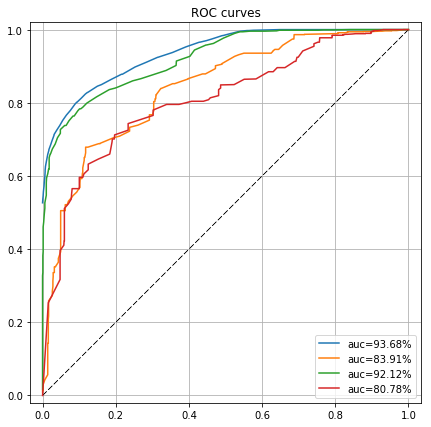

In [76]:
# ROCs
plt.figure(figsize=(7, 7))
# Random Forest, 93.68
plot_roc(y_test, RCprobas)
# Logit, 83.91
plot_roc(y_true, lfprobas)
# Gradient Boost, 92.12
plot_roc(y_true, GBprobas)
# Gaussian Naive Bayes, 80.78
plot_roc(y_true, gnbprobas)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
# loop through many K values for KNN, calculate accuracy scores and append to list

k_scores = []

for k in range(1, 5):

    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    
    k_scores.append((k, scores.mean()))
    
k_scores = pd.DataFrame(k_scores, columns=['k', 'accuracy']).set_index('k')
k_scores[k_scores.accuracy==max(k_scores.accuracy)]

# k=2 is best. Accuracy score of 0.83 is not bad.

,accuracy
k,
4,0.813931
